In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report,accuracy_score
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv("D:\\course\\Data Analysis\\INSAID\\Fraud.csv")

In [3]:
data[data['step'] >= 400]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5756120,400,TRANSFER,1151981.33,C1169964637,19961.00,0.00,C1888940727,401552.02,1553533.36,0,0
5756121,400,PAYMENT,12317.27,C1821536306,114969.00,102651.73,M182779127,0.00,0.00,0,0
5756122,400,TRANSFER,1305558.68,C675360422,102651.73,0.00,C1881971243,4178031.32,5483589.99,0,0
5756123,400,CASH_OUT,88950.10,C204190501,30280.00,0.00,C1377615799,0.00,88950.10,0,0
5756124,400,PAYMENT,15936.07,C1934049650,1904.00,0.00,M1583941801,0.00,0.00,0,0
5756125,400,PAYMENT,13463.43,C2138843612,10592.00,0.00,M782176141,0.00,0.00,0,0
5756126,400,PAYMENT,1760.58,C1738184701,19173.00,17412.42,M1906374631,0.00,0.00,0,0
5756127,400,PAYMENT,22777.52,C1863058118,17412.42,0.00,M960076749,0.00,0.00,0,0
5756128,400,PAYMENT,10018.20,C179291752,0.00,0.00,M2093352725,0.00,0.00,0,0
5756129,400,PAYMENT,16496.02,C1934831737,0.00,0.00,M104933933,0.00,0.00,0,0


In [4]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [8]:
data = data[~data.nameDest.str.contains('M')]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020FCED5A978>,
      dtype=object)

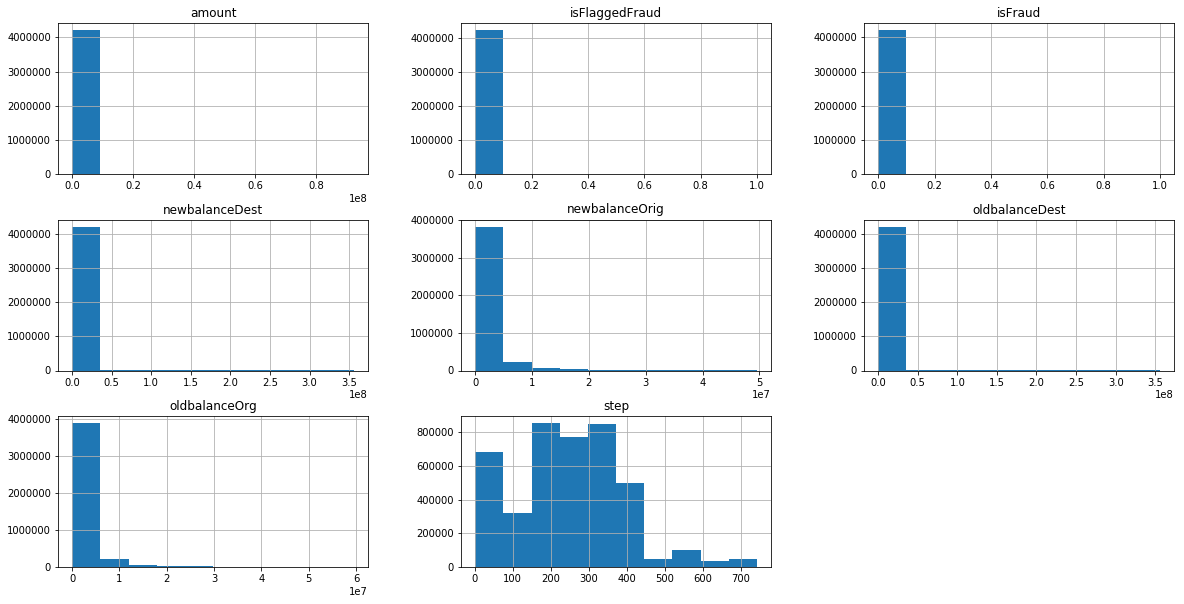

In [9]:
data.hist(figsize=(20 , 10))

In [10]:
avgobo = data.oldbalanceOrg.mean()
avgobo

1225067.6843380036

In [11]:
avgnbo = data.newbalanceOrig.mean()
avgnbo

1260404.147791012

In [12]:
stdnbo = data.newbalanceOrig.std()
stdnbo

3523174.1200509444

In [13]:
avgnbo-stdnbo

-2262769.972259932

In [14]:
# temp = data[data['amount'] > 200000]

In [15]:
# temp = temp[data['type'] == "TRANSFER"]
# temp = temp[temp['newbalanceOrig'] < avgnbo - stdnbo]
temp = data[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud']]

C:\Users\Chirag\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


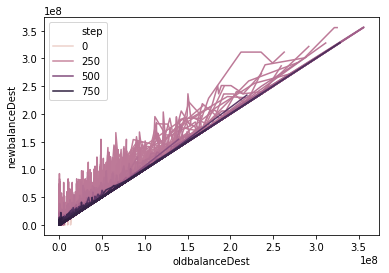

In [16]:
sb.lineplot(x= data['oldbalanceDest'], y = data['newbalanceDest'], hue = data['step'])

In [17]:
count_classes = pd.value_counts(data['isFraud'], sort = True)

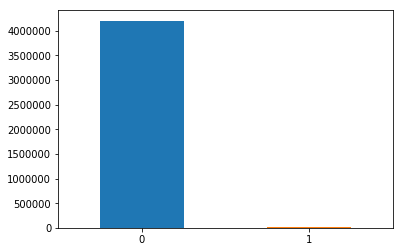

In [18]:
count_classes.plot(kind = 'bar' , rot = 0)

In [19]:
fraud = data[data['isFraud'] == 1]
normal = data[data['isFraud'] == 0]

In [20]:
print(fraud.shape, normal.shape)

(8213, 11) (4202912, 11)


In [21]:
fraud.amount.describe()

count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64

In [22]:
normal.amount.describe()

count    4.202912e+06
mean     2.627329e+05
std      7.185354e+05
min      1.000000e-02
25%      7.603766e+04
50%      1.587821e+05
75%      2.780281e+05
max      9.244552e+07
Name: amount, dtype: float64

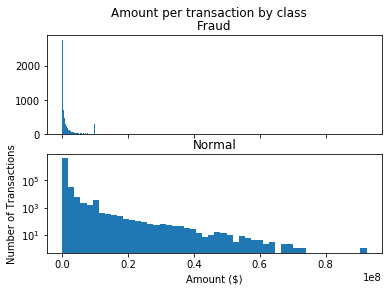

In [23]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show();

In [24]:
#Removing outliers using the standard deviation method

In [25]:
    #Removing values which are both below 25% of mean and above 75% of mean and then applying machine learning to rest of the data 

In [26]:
forsvm = data[data['amount'] > 1.338957e+04]

In [27]:
forsvm = forsvm[forsvm['amount'] < 2.087215e+05]

In [28]:
forsvm.shape

(2411238, 11)

In [29]:
#Taking a sample data for the calculations 

In [30]:
sample = forsvm.sample(frac = 0.1, random_state=1)

In [31]:
sample.shape

(241124, 11)

In [32]:
sample_fraud = sample[sample['isFraud'] == 1]

In [33]:
sample_valid = sample[sample['isFraud'] == 0]

In [34]:
outlier_fraction = len(sample_fraud)/float(len(sample_valid))

In [35]:
print(outlier_fraction)

print("Fraud Cases : {}".format(len(sample_fraud)))

print("Valid Cases : {}".format(len(sample_valid)))

0.001008796874805402
Fraud Cases : 243
Valid Cases : 240881


In [36]:
correlation = sample.corr()

In [37]:
top_features = correlation.index

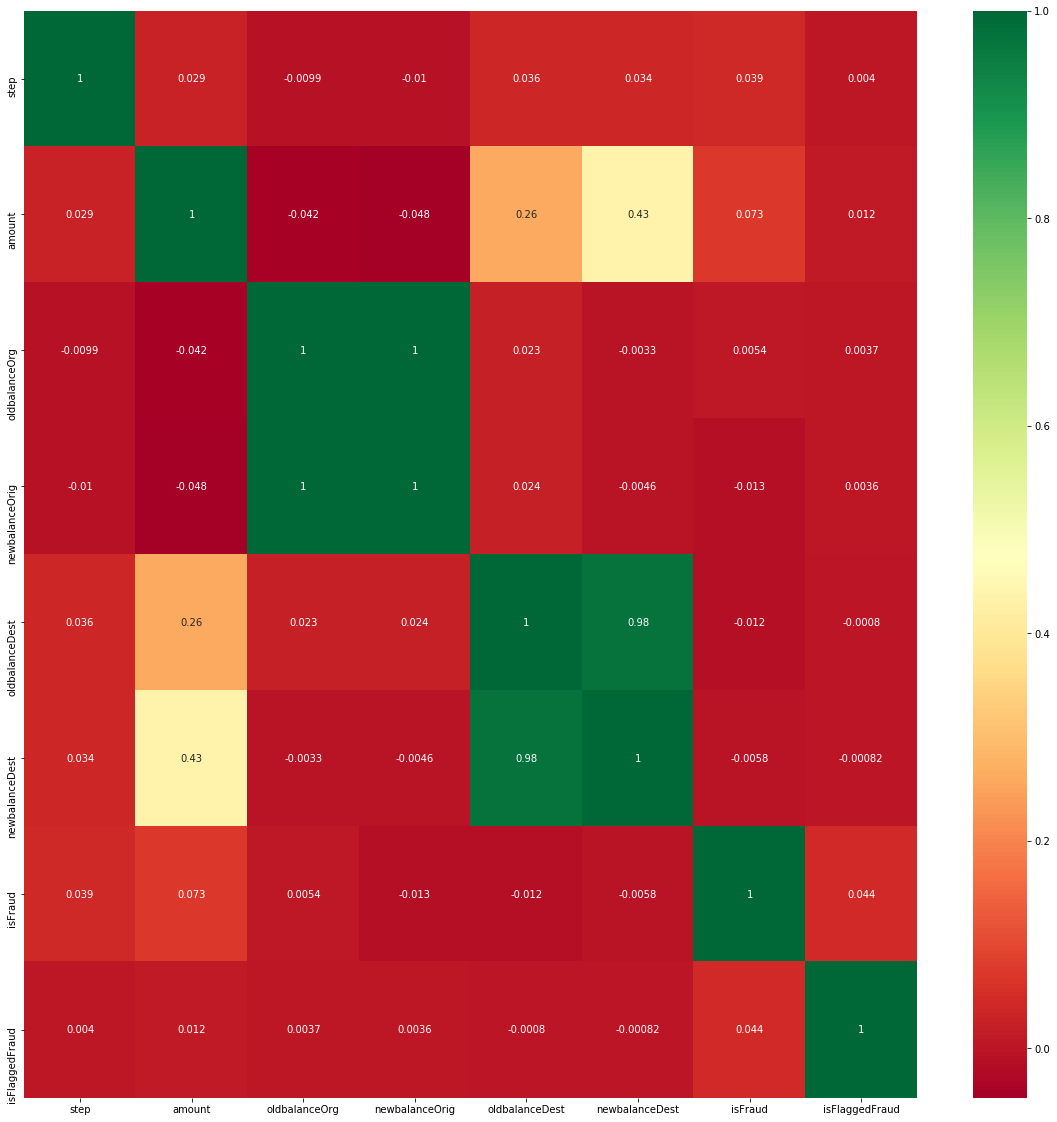

In [38]:
plt.figure(figsize=(20,20))
g=sb.heatmap(data[top_features].corr(),annot=True,cmap="RdYlGn")

In [39]:
sample.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,241124.000000,241124.000000,2.411240e+05,2.411240e+05,2.411240e+05,2.411240e+05,241124.000000,241124.0
mean,244.183420,105381.072168,1.389994e+06,1.415126e+06,1.440483e+06,1.490631e+06,0.001008,0.0
std,141.581137,55021.615668,3.696847e+06,3.725181e+06,3.662694e+06,3.689253e+06,0.031730,0.0
min,1.000000,13392.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,157.000000,58120.637500,0.000000e+00,0.000000e+00,1.294447e+05,1.622019e+05,0.000000,0.0
50%,249.000000,102500.890000,2.051550e+04,0.000000e+00,4.447042e+05,4.960609e+05,0.000000,0.0
75%,334.000000,151236.235000,2.709088e+05,2.829315e+05,1.428072e+06,1.484998e+06,0.000000,0.0
max,741.000000,208720.220000,4.381886e+07,4.368662e+07,3.555534e+08,3.553814e+08,1.000000,0.0


In [40]:
sample.columns.tolist()

['step',
 'type',
 'amount',
 'nameOrig',
 'oldbalanceOrg',
 'newbalanceOrig',
 'nameDest',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

In [41]:
columns = sample.columns.tolist()

In [42]:
#As 3 of the 4 columns are string columns and can't be used in SVM
# And one is the target variable
columns = [c for c in columns if c not in ["isFraud", "nameOrig", "nameDest", "type"]]

In [43]:
target = "isFraud"

In [44]:
state = np.random.RandomState(42)

In [45]:
X = sample[columns]
Y = sample[target]

In [46]:
print(X.shape)
print(Y.shape)

(241124, 7)
(241124,)


In [47]:
clf = IsolationForest(n_estimators=100, max_samples=len(X), contamination=outlier_fraction,random_state=state, verbose=0)

In [48]:
clf.fit(X)
scores_prediction = clf.decision_function(X)
y_pred = clf.predict(X)

C:\Users\Chirag\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\Chirag\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [49]:
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred != Y).sum()
# Run Classification Metrics
print("{}".format(n_errors))
print("Accuracy Score :")
print(accuracy_score(Y,y_pred))
print("Classification Report :")
print(classification_report(Y,y_pred))

487
Accuracy Score :
0.9979802922977389
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    240881
           1       0.00      0.00      0.00       243

   micro avg       1.00      1.00      1.00    241124
   macro avg       0.50      0.50      0.50    241124
weighted avg       1.00      1.00      1.00    241124



# Observations

Isolation Forest detected 487 errors with an accuracy of 99.79% as shown in the report above. Hence, using Isolation Forest seems optimal for this classification problem. Here, errors are the detected fraudulant transactions that were made in the sample dataset. 



Furthermore, in this dataset, most important variables are "amount" and "isFraud" followed by the "oldbalanceOrg", "newbalanceOrig" as observed by using corelation matrix. I also used the mean and the standard deviation of the data to figure out the outliers of the data and filtered the complete data between the range (1.338957e+04, 2.087215e+05) of the amount column which are 25% of the mean value and 75% of the mean value respectively. Finally, I took a fraction of the resultant dataset and randomly selected 10% of that data to be the sample data for the Isolation Forrest classifier. 

# selecting variables

In order to select the variables for the model, I needed to first fully understand the dataset hence I started with plotting graphs and plots using seaborn library to be able to visualize the entire data. I decided not to use the name variables like "nameDest" for the calculation purposes as these variables cannot be fed to the Forrest Algorithm for the further calculations. 

After that was done, I looked at the float variables and mapped them to find the correlation between them. I found that the relation between "oldbalanceDest", "newbalanceDest" and the "amount" was relatively higher so I decided to choose them as my major independent variables and choose "isFraud" as dependent variable. 

I decided to first try implementing the isolation forest algorithm taking "isFraud" as dependent and all the other float type variables as independent to see the performance and observed that the performance of the model was coming out to be 99.79% hich was more than I expected. The modeling also took a lot of time in running so I decided not to filture out indipendent variables any further. 

# Factors to predict fraudulant customers

The key factors to predict the fraudulant transactions, according to the data, are the amount of the transaction and the change in balance of the destination account. 

These factors, when carefully pondered upon, makes a lot of sense. Firstly, the fraudulent coustomers usually know about the 200,000 limit so they will make sure that they do the transaction of an amount below that said amount but in these cases they tend to do multiple transactions of same amount in short period of time.

In [51]:
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
251,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0
252,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0
680,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0


Furthermore, as can be seen from above, in most of the cases, the fraudulent customers will either cash out the money from their account after transfering money from the victom leading to a net ballance of 0 or they somehow transfer they money to a dummey account that ould reflect no change in balance of the destination account. So either ways, the three mentioned factors plays an important role in fraud detection. 

# Suggested Preventions

We can improve our detection model accuracy by increasing the sample size or by using deep learning algorithms that would end up detecting other types of anomalies in transaction, however at the cost of computational expense. A relatively new way to prevent these kinds of frauds is by using the edge technology and analyze the data that the user has entered in the real time. By doing this, one can easily pause the transaction before it even gets processed and the owner of the account can automatically notified about the same. 

# How do we know that these prevention measures actually work?

The suggested prevention measures can be tested regularly by adding different kinds of fraudulant transactions to a testing account once every year and then check the relative accuracy of fraud prediction. We can also introduce different types of fraudulent activities to check the algorithm's accuracy in those cases. 